In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load the data
df = pd.read_csv("german_credit_data.csv")

In [3]:
#basic checks
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


(1000, 10)

In [4]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [5]:
print(df.columns)

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')


In [6]:
#missing values
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [7]:
df.isnull().mean().sort_values(ascending=False)

Checking account    0.394
Saving accounts     0.183
Age                 0.000
Unnamed: 0          0.000
Job                 0.000
Sex                 0.000
Housing             0.000
Credit amount       0.000
Duration            0.000
Purpose             0.000
dtype: float64

In [8]:
#fill missing values
df["Saving accounts"] = df["Saving accounts"].fillna("unknown")
df["Checking account"] = df["Checking account"].fillna("unknown")

In [9]:
#age analysis
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [10]:
df.groupby("Sex")["Age"].mean()

Sex
female    32.803226
male      36.778261
Name: Age, dtype: float64

In [11]:
#Credit Amount Analysis
df["Credit amount"].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Credit amount, dtype: float64

In [12]:
df.groupby("Housing")["Credit amount"].mean().sort_values(ascending=False)

Housing
free    4906.212963
rent    3122.553073
own     3060.939691
Name: Credit amount, dtype: float64

In [13]:
#Duration vs Credit
df.groupby("Duration")["Credit amount"].mean().head(10)

Duration
4     1662.833333
5     3448.000000
6     1787.733333
7     1779.200000
8     1373.000000
9     1714.714286
10    1888.964286
11    3047.888889
12    1787.446927
13    1547.250000
Name: Credit amount, dtype: float64

In [14]:
df.corr(numeric_only=True)

,Unnamed: 0,Age,Job,Credit amount,Duration
Unnamed: 0,1.000000,-0.010096,-0.027345,0.013488,0.030788
Age,-0.010096,1.000000,0.015673,0.032716,-0.036136
Job,-0.027345,0.015673,1.000000,0.285385,0.210910
Credit amount,0.013488,0.032716,0.285385,1.000000,0.624984
Duration,0.030788,-0.036136,0.210910,0.624984,1.000000


In [15]:
#Purpose based risk intuition(EDA)
df["Purpose"].value_counts()

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

In [16]:
df.groupby("Purpose")["Credit amount"].mean().sort_values(ascending=False)

Purpose
vacation/others        8209.333333
business               4158.041237
car                    3768.192878
furniture/equipment    3066.988950
education              2879.203390
repairs                2728.090909
radio/TV               2487.653571
domestic appliances    1498.000000
Name: Credit amount, dtype: float64

In [17]:
#Job vs credit behaviour
df.groupby("Job")["Credit amount"].agg(["mean","median","count"])

,mean,median,count
Job,,,
0,2745.136364,1416.0,22
1,2358.520000,1622.0,200
2,3070.965079,2324.0,630
3,5435.493243,4459.0,148


In [18]:
#housing risk signals
df.groupby("Housing")["Duration"].mean()

Housing
free    27.453704
own     20.328191
rent    19.240223
Name: Duration, dtype: float64

In [19]:
#Credit per month
df["credit_per_month"] = df["Credit amount"]/ df["Duration"]

In [20]:
#Age Buckets
df["age_group"] = pd.cut(
    df["Age"],
    bins=[18,25,35,45,60,100],
    labels=["18-25","26-35","36-45","46-60","60+"]
)

In [21]:
#Segment Customers
df.groupby("age_group", observed=True)["Credit amount"].mean()

age_group
18-25    3003.357895
26-35    3298.690955
36-45    3529.862832
46-60    3187.936170
60+      3122.066667
Name: Credit amount, dtype: float64

In [22]:
df.groupby("age_group", observed=True)["credit_per_month"].mean()

age_group
18-25    153.194119
26-35    161.056174
36-45    186.480891
46-60    154.517896
60+      234.401682
Name: credit_per_month, dtype: float64

In [23]:
#High credit Customers
df[df["Credit amount"]> df["Credit amount"].quantile(0.90)]

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,credit_per_month,age_group
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,187.666667,36-45
5,5,35,male,1,free,unknown,unknown,9055,36,education,251.527778,26-35
17,17,25,male,2,own,unknown,little,8072,30,business,269.066667,18-25
18,18,44,female,3,free,little,moderate,12579,24,car,524.125000,36-45
48,48,39,male,1,own,little,unknown,7228,11,car,657.090909,36-45
...,...,...,...,...,...,...,...,...,...,...,...,...
953,953,26,female,3,own,little,unknown,10974,36,furniture/equipment,304.833333,26-35
971,971,43,male,1,own,little,unknown,7393,24,car,308.041667,36-45
973,973,36,male,2,rent,little,little,7297,60,business,121.616667,36-45
980,980,49,male,2,own,little,moderate,8386,30,furniture/equipment,279.533333,46-60


In [24]:
#Duration risk segment
df["duration_risk"]= pd.cut(
    df["Duration"],
    bins=[0,12,24,36,60,100], 
    labels=["Short","Medium","Long","Very Long","Extreme"]
)

In [25]:
#Cross Analysis
pd.crosstab(df["Housing"],df["duration_risk"],normalize="index")

duration_risk,Short,Medium,Long,Very Long,Extreme
Housing,,,,,
free,0.222222,0.388889,0.148148,0.240741,0.000000
own,0.373072,0.405330,0.151473,0.068724,0.001403
rent,0.385475,0.446927,0.106145,0.061453,0.000000


In [26]:
#Encode Categorical
df_encoded = pd.get_dummies(df, drop_first=True)

In [27]:
#Scale numeric data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_encoded[["Age", "Credit amount","Duration","credit_per_month"]]=scaler.fit_transform(
    df_encoded[["Age", "Credit amount", "Duration", "credit_per_month"]]
)

In [28]:
#clustering
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
df["risk_cluster"] = kmeans.fit_predict(
    df_encoded[["Age", "Credit amount", "Duration"]]
)


In [29]:
#cluster interpretation
df.groupby("risk_cluster")[["Age","Credit amount","Duration"]].mean() 

,Age,Credit amount,Duration
risk_cluster,,,
0,34.756614,7609.634921,39.275132
1,51.651786,2398.473214,15.848214
2,29.654174,2207.459966,16.916525


In [30]:
#top risky segment
df[df["risk_cluster"] == df["risk_cluster"].value_counts().idxmax()]

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,credit_per_month,age_group,duration_risk,risk_cluster
10,10,25,female,2,rent,little,moderate,1295,12,car,107.916667,18-25,Short,2
12,12,22,female,2,own,little,moderate,1567,12,radio/TV,130.583333,18-25,Short,2
14,14,28,female,2,rent,little,little,1403,15,car,93.533333,26-35,Medium,2
15,15,32,female,1,own,moderate,little,1282,24,radio/TV,53.416667,26-35,Medium,2
19,19,31,male,2,own,quite rich,unknown,3430,24,radio/TV,142.916667,26-35,Medium,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,991,34,male,1,own,moderate,unknown,1569,15,radio/TV,104.600000,26-35,Medium,2
992,992,23,male,1,rent,unknown,little,1936,18,radio/TV,107.555556,18-25,Medium,2
995,995,31,female,1,own,little,unknown,1736,12,furniture/equipment,144.666667,26-35,Short,2
996,996,40,male,3,own,little,little,3857,30,car,128.566667,36-45,Long,2


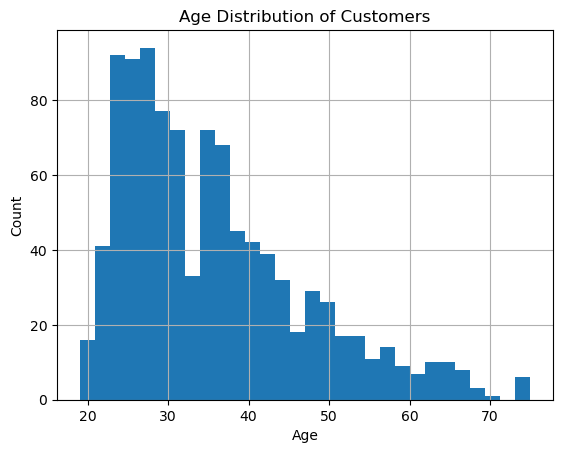

In [31]:
import matplotlib.pyplot as plt
plt.figure()
df["Age"].hist(bins=30)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

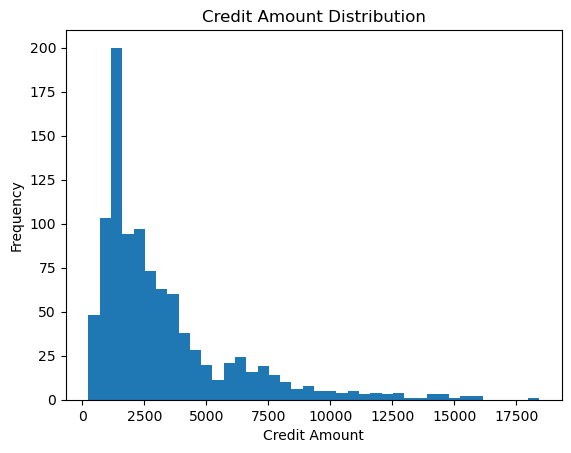

In [32]:
#Credit Amount Distribution
plt.figure()
plt.hist(df["Credit amount"],bins=40)
plt.title("Credit Amount Distribution")
plt.xlabel("Credit Amount")
plt.ylabel("Frequency")
plt.show()

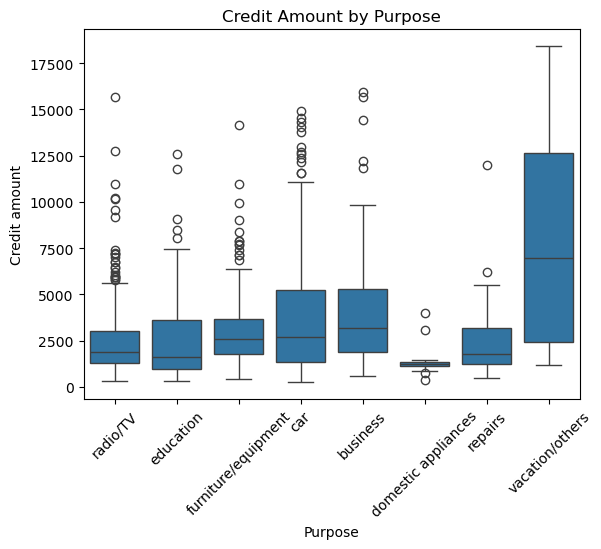

In [33]:
#Purpose vs Credit Amount
import seaborn as sns
plt.figure()
sns.boxplot(x="Purpose",y="Credit amount", data=df)
plt.xticks(rotation=45)
plt.title("Credit Amount by Purpose")
plt.show()

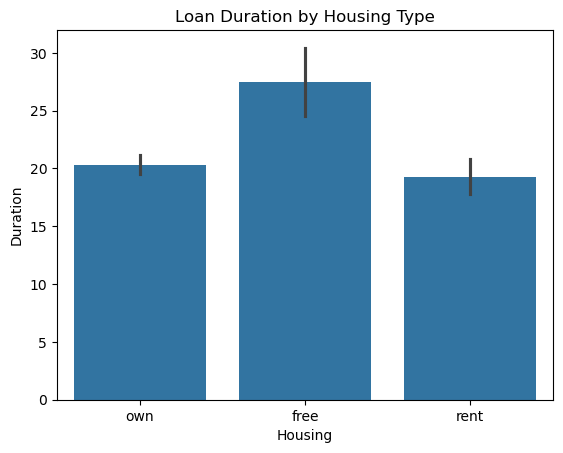

In [34]:
#Housing vs duration
plt.figure()
sns.barplot(x="Housing",y="Duration", data= df)
plt.title("Loan Duration by Housing Type")
plt.show()

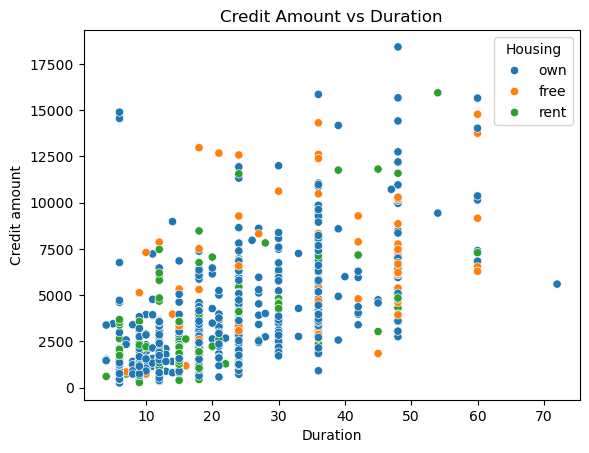

In [35]:
#Multi variable analysis
sns.scatterplot(
    x="Duration",
    y="Credit amount",
    hue="Housing",
    data=df
)
plt.title("Credit Amount vs Duration")
plt.show()

In [36]:
#Risk Profiling
df["High_risk_flag"] =(
    (df["Credit amount"]> df["Credit amount"].quantile(0.75)) &
    (df["Duration"] > df["Duration"].quantile(0.75))
)

In [37]:
df["High_risk_flag"].value_counts(normalize=True)

High_risk_flag
False    0.847
True     0.153
Name: proportion, dtype: float64

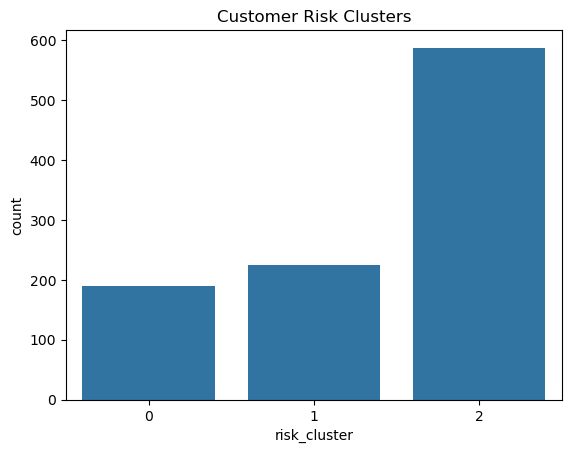

In [38]:
#risk segment visualization
sns.countplot(x="risk_cluster", data=df)
plt.title("Customer Risk Clusters")
plt.show()

In [39]:
#Storytelling
risk_summary = df.groupby("risk_cluster").agg({
    "Credit amount":"mean",
    "Duration":"mean",
    "Age":"mean"
})
risk_summary

,Credit amount,Duration,Age
risk_cluster,,,
0,7609.634921,39.275132,34.756614
1,2398.473214,15.848214,51.651786
2,2207.459966,16.916525,29.654174


In [40]:
df.to_csv("GermanCreditCard.ipynb", index=False)